In [1]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas import Series,DataFrame
from matplotlib import cm

print(np.version.full_version)
print(matplotlib.__version__)
print(pd.__version__)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 6

1.15.4
2.1.1
0.23.4


<b>単回帰分析　Linear Regression with One Variable</b>
<hr/>
<ul>
<hr>
<li>仮定関数 (Hypothesis function)：$h_\theta \left( x \right)=\theta_{0}+\theta_{1}x$</li>
<hr>
<li>コスト関数（cost function）：$J \left( \theta_0, \theta_1 \right) = \frac{1}{2m}\sum\limits_{i=1}^m \left( h_{\theta}(x^{(i)})-y^{(i)} \right)^{2}$</li>
<hr>
<li>モデル式のパラメーター（\(\theta_0 \)と\(\theta_1 \)）の最適な値の求め方</li>
</ul>

<img src="./images/2c9fe871ca411ba557e65ac15d55745d.png">


<b>最急降下法　Gradient Descent</b>
<hr/>
$\large {\theta_{j}}:={\theta_{j}}-\alpha \frac{\partial }{\partial {\theta_{j}}}J\left( \theta \right)$ （偏微分）

$\large a$:学習率 (learning rate)

Correct: Simultaneous update {

​ $temp0 :={\theta_{0}}-\alpha \frac{\partial }{\partial {\theta_{0}}}J\left(\theta_{0}, \theta_{1} \right)$

​ $temp1 :={\theta_{1}}-\alpha \frac{\partial }{\partial {\theta_{1}}}J\left(\theta_{0}, \theta_{1} \right)$

​ ${\theta_{0}}:=temp0$

​ ${\theta_{1}}:=temp1$

}

<img src="./images/Gradient Descent.PNG" width="500">


<b>Linear Regression with Gradient Descent</b>

$\frac{\partial }{\partial {{\theta }{j}}}J({{\theta }{0}},{{\theta }{1}})=\frac{\partial }{\partial {{\theta }{j}}}\frac{1}{2m}{{\sum\limits_{i=1}^{m}{\left( {{h}_{\theta }}({{x}^{(i)}})-{{y}^{(i)}} \right)}}^{2}}$

<br/>

$j=0$ 时：$\frac{\partial }{\partial {{\theta }{0}}}J({{\theta }{0}},{{\theta }{1}})=\frac{1}{m}{{\sum\limits_{i=1}^{m}{\left( {{h}_{\theta }}({{x}^{(i)}})-{{y}^{(i)}} \right)}}}$

$j=1$ 时：$\frac{\partial }{\partial {{\theta }{1}}}J({{\theta }{0}},{{\theta }{1}})=\frac{1}{m}\sum\limits_{i=1}^{m}{\left( \left( {{h}_{\theta }}({{x}^{(i)}})-{{y}^{(i)}} \right)\cdot {{x}^{(i)}} \right)}$


So, Repeat until convergence {

​ ${\theta_{0}}:={\theta_{0}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{ \left({{h}_{\theta }}({{x}^{(i)}})-{{y}^{(i)}} \right)}$

​ ${\theta_{1}}:={\theta_{1}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{\left( \left({{h}_{\theta }}({{x}^{(i)}})-{{y}^{(i)}} \right)\cdot {{x}^{(i)}} \right)}$

​ }

In [9]:
df = pd.read_csv("./ex1/ex1data1.txt", names=["population", "profit"])#读取数据并赋予列名
df.head()

population   profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233

In [17]:
X =  np.array(df["population"])
y =  np.array(df["profit"])
plt.plot(X, y, 'rx', markersize=10)

<b>（おすすめ1）sklearn.linear_modelの正規方程式 LinearRegressionを使う</b>

In [20]:
# Scikit-learnの組み込み最小二乗法
from sklearn.linear_model import LinearRegression
print("LinearRegression on sklearn.linear_model ...")
regr = LinearRegression(normalize=False) #Trueにした場合は平均とL2ノルムでスケール調整が行われる
regr.fit(X.reshape(-1, 1), y) #データが1変数の場合はreshapeするのが大事
print("Intercept:", regr.intercept_) #切片（定数項）
print("Coefficients: ", regr.coef_) #xの係数
predicts = regr.predict(np.array([3.5, 7]).reshape(-1, 1))
print("For population = [35k, 70k], we predict a profit of \n", predicts * 10000)
print()

LinearRegression on sklearn.linear_model ...
Intercept: -3.89578087831185
Coefficients:  [1.19303364]
For population = [35k, 70k], we predict a profit of 
 [ 2798.36876352 44554.54631015]



<b>（おすすめ2）sklearn.linear_modelのSGDRegressorを使う</b>

In [21]:
# Scikit-learnの組み込み勾配降下法による回帰
from sklearn.linear_model import SGDRegressor
print("SGDRegressor on sklearn.linear_model ...")
#shuffle=Falseにすると最急降下法になるはず。max_iterはScikit-learn0.19以降
regr = SGDRegressor(eta0=0.01, learning_rate="constant", max_iter=1500, shuffle=False)
regr.fit(X.reshape(-1, 1), y)
print("Intercept:", regr.intercept_)
print("Coefficients: ", regr.coef_)
predicts = regr.predict(np.array([3.5, 7]).reshape(-1, 1))
print("For population = [35k, 70k], we predict a profit of \n", predicts * 10000)
print()

SGDRegressor on sklearn.linear_model ...
Intercept: [-3.84811446]
Coefficients:  [1.05704926]
For population = [35k, 70k], we predict a profit of 
 [-1484.42048023 35512.30359183]



$\large J(w_{0}, w_{1}) = \frac{1}{2m} \sum_{i=1}^m((w_{1}x+w_{0}) - y_{i})^{2}$

In [24]:
#コスト関数
#w0,w1を決めて上、全部のコストを計算し合計する
#J(w_{0}, w_{1}
# コスト関数
def compute_cost(X, y, theta):
    return np.sum((np.dot(X, theta) - y) ** 2) / 2 / len(y)

X = np.array((np.ones(len(y)), X)).T
print(compute_cost(X,y,theta = np.zeros(2)))

32.072733877455676


<ul>
<li>最急降下法の数式：<br><br>
\(\large w_{0} := w_{0} - \alpha\frac{1}{m}\sum_{i=1}^m(\hat y_{i} - y_{i}) \)<br><br>
\(\large w_{1} := w_{1} - \alpha\frac{1}{m}\sum_{i=1}^m(\hat y_{i} - y_{i})\cdot x_{i} \)
</li>
<hr>
</ul>


In [32]:
#最急降下法
def gradient_descent(X, y, theta, alpha, num_iters):
    J_history = []
    theta_out = theta
    for i in range(num_iters):
        theta_out -= alpha / len(y) * np.dot(X.T, np.dot(X, theta_out) - y)
        J_history.append(compute_cost(X, y, theta_out))
    return theta_out, J_history

theta, J_history = gradient_descent(X, y, np.zeros(2), 0.01, 1500)
print("Theta found by gradient descent:", theta)

Theta found by gradient descent: [-3.63029144  1.16636235]


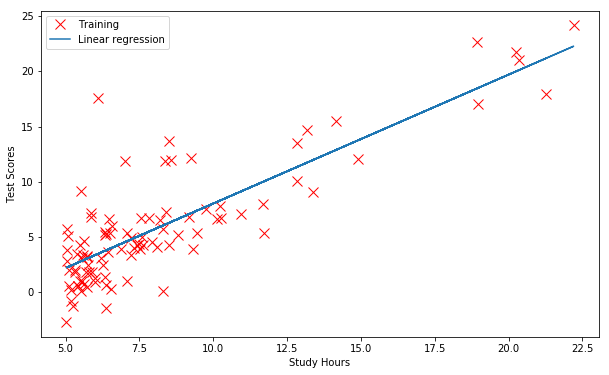

In [33]:
# 動画内のコード
plt.plot(X[:,1:],y, 'rx', markersize=10, label='Training')
plt.xlabel('Study Hours')
plt.ylabel('Test Scores')

plt.plot(X[:,1:], np.dot(X, theta), '-', label='Linear regression')
plt.legend()
plt.show()

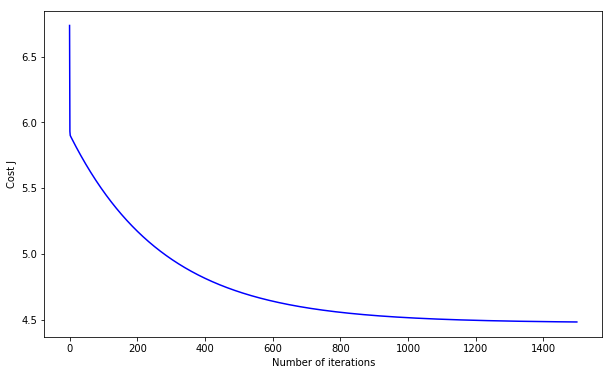

In [37]:
# 収束グラフのプロット
plt.plot(np.arange(len(J_history)), J_history, color="b")
plt.xlabel("Number of iterations")
plt.ylabel("Cost J")
plt.show()

<b>重回帰分析　Linear Regression with Multiple Variables</b>
<hr/>

$\large h_{\theta}\left( x \right)={\theta_{0}}+{\theta_{1}}{x_{1}}+{\theta_{2}}{x_{2}}+...+{\theta_{n}}{x_{n}}$

$\large h_{\theta}\left( x \right) = \theta^T X$

$\theta = \begin{bmatrix}{\theta_{0}} \newline {\theta_{1}} \newline \vdots \newline {\theta_{n}}\end{bmatrix}$

$X = \begin{bmatrix}x_0 \newline x_1 \newline \vdots \newline x_n\end{bmatrix}$

<b>目的関数 (Cost Function)</b>
<hr/>
$\large J\left( {\theta_{0}},{\theta_{1}}...{\theta_{n}} \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( h_{\theta} \left({x}^{\left( i \right)} \right)-{y}^{\left( i \right)} \right)}^{2}}}$ 

<b>最急降下法　Gradient Descent for Multiple Variables</b>

$\large \theta_j := \theta_j - \alpha\frac{\partial}{\partial \theta_j}J(\theta)
             = \theta_j - \alpha \sum_{i=1}^m (h_\theta (x^{(i)}) - y^{(i)}) x_j ^{(i)}$

$\begin{align*} & \text{repeat until convergence:} \; \lbrace \newline \; & \theta_0 := \theta_0 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_0^{(i)}\newline \; & \theta_1 := \theta_1 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_1^{(i)} \newline \; & \theta_2 := \theta_2 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_2^{(i)} \newline & \cdots \newline \rbrace \end{align*}$




In [45]:
df = pd.read_csv("./ex1/ex1data2.txt", names=["population", "star","profit"])#读取数据并赋予列名
df.head()

population  star  profit
0        2104     3  399900
1        1600     3  329900
2        2400     3  369000
3        1416     2  232000
4        3000     4  539900

In [72]:
X_data =  np.array(df[["population", "star"]])
y =  np.array(df[["profit"]])
m = len(y)
print(m)
#データの確認
for i in range(10):
    print("X_data=[{:.0f} {:.0f}], y= {:.0f}".format(int(X_data[i,0]), int(X_data[i,1]), int(y[i])))

47
X_data=[2104 3], y= 399900
X_data=[1600 3], y= 329900
X_data=[2400 3], y= 369000
X_data=[1416 2], y= 232000
X_data=[3000 4], y= 539900
X_data=[1985 4], y= 299900
X_data=[1534 3], y= 314900
X_data=[1427 3], y= 198999
X_data=[1380 3], y= 212000
X_data=[1494 3], y= 242500


In [73]:
flg = plt.figure()
ax = flg.gca(projection='3d')    # <- axes3dをインポートしていないとエラーになる。
ax.set_xlabel('population')
ax.set_ylabel('star')
ax.set_zlabel('profit')
scatter = ax.scatter3D(X_data.T[0], X_data.T[1], y,s=5, cmap=plt.cm.viridis)    # 色のパターン
plt.show()

<b>（おすすめ1）sklearn.linear_modelのLinearRegressionを使う</b>

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Scikit-learnの組み込み最小二乗法
from sklearn.linear_model import LinearRegression
print("LinearRegression on sklearn.linear_model ...")
regr = LinearRegression(normalize=False)
X_data =  np.array(df[["population", "star"]])
regr.fit(X_data, y)
print("Intercept:", regr.intercept_) #切片（定数項）
print("Coefficients: ", regr.coef_) #xの係数
print("Predicted price of a 1650 sq-ft, 3 br house  ... (using LinearRegression):")
predict = regr.predict(np.array([[1650, 3]]))
print("$", predict)
print()

LinearRegression on sklearn.linear_model ...
Intercept: [89597.9095428]
Coefficients:  [[  139.21067402 -8738.01911233]]
Predicted price of a 1650 sq-ft, 3 br house  ... (using LinearRegression):
$ [[293081.4643349]]



<b>（おすすめ2）sklearn.linear_modelのSGDRegressorを使う前に</b>

<b>スケーリング (feature scaling)</b>

$\large x_i = \frac{x_i - mean(x)}{SD(x)}$ （$SD(x)$ は$x$の標準偏差）

或いは

$\large x_i = \frac{x_i - mean(x)}{max(x) - min(x)}$



In [92]:
# データの標準化
def feature_normalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X-mu)/sigma
    return X_norm, mu, sigma

<b>（おすすめ2）sklearn.linear_modelのSGDRegressorを使う</b>

In [93]:
X_data =  np.array(df[["population", "star"]])
X, mu, sigma = feature_normalize(X_data)

# Scikit-learnの組み込み勾配降下法による回帰
from sklearn.linear_model import SGDRegressor
print("SGDRegressor on sklearn.linear_model ...")
regr = SGDRegressor(eta0=0.01, learning_rate="constant", max_iter=400, shuffle=False)
regr.fit(X, y)
print("Intercept:", regr.intercept_)
print("Coefficients: ", regr.coef_)
predict = regr.predict((np.array([[1650, 3]] - mu) / sigma))
print("Predicted price of a 1650 sq-ft, 3 br house  ... (using SGDRegressor):")
print("$", predict)
print()

SGDRegressor on sklearn.linear_model ...
Intercept: [339319.80384871]
Coefficients:  [106385.95873423  -7991.38807423]
Predicted price of a 1650 sq-ft, 3 br house  ... (using SGDRegressor):
$ [293673.79997156]



C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


最急降下法（ベクトル化）

\(\large {\theta} := {\theta} - \alpha\frac{1}{m}X^{T}(X{\theta} - y) \)

<b>Normal Equation</b>
<hr/>

$\theta ={{\left( {X^T}X \right)}^{-1}}{X^{T}}y$ 

<img src="./images/333df5f11086fee19c4fb81bc34d5125.png">


In [105]:
# 正規方程式
def normal_eqn(X, y):
    return np.dot(np.dot(np.linalg.pinv(np.dot(X.T, X)), X.T), y)